# <span style="color:#573D1C"> ThemisAI QuickStart: Aleatoric Uncertainty (Label Noise)</span>

### <span style="color:#B8D8D8"> Capsa automatically wraps ML workflows to achieve risk-aware learning and deployment.</span>

In this demo, we'll be demonstrating how **CAPSA**, the risk awareness framework that we've developed at **Themis AI**, can be used to capture noise in the data: mislabeled datapoints, ambiguous labels, etc.

<span style="color:#B8D8D8">Note:</span> We will be utilizing CAPSA's **MVE Wrapper** metric. **CAPSA** provides several other metrics that we will not be using in this tutorial.

As an ML developer, you are interested in implementing a dynamic noise detection capabilities into your own model. You don't want to implement it yourself, you don't want complexity. And you're interested in simple tools that you can utilize.
**CAPSA** provides you with those vital, yet easy to use tools.

Warning: This notebook includes some functions from a helper python file. These function are used to hide away some of the usual workflow.   

<center>
<div>
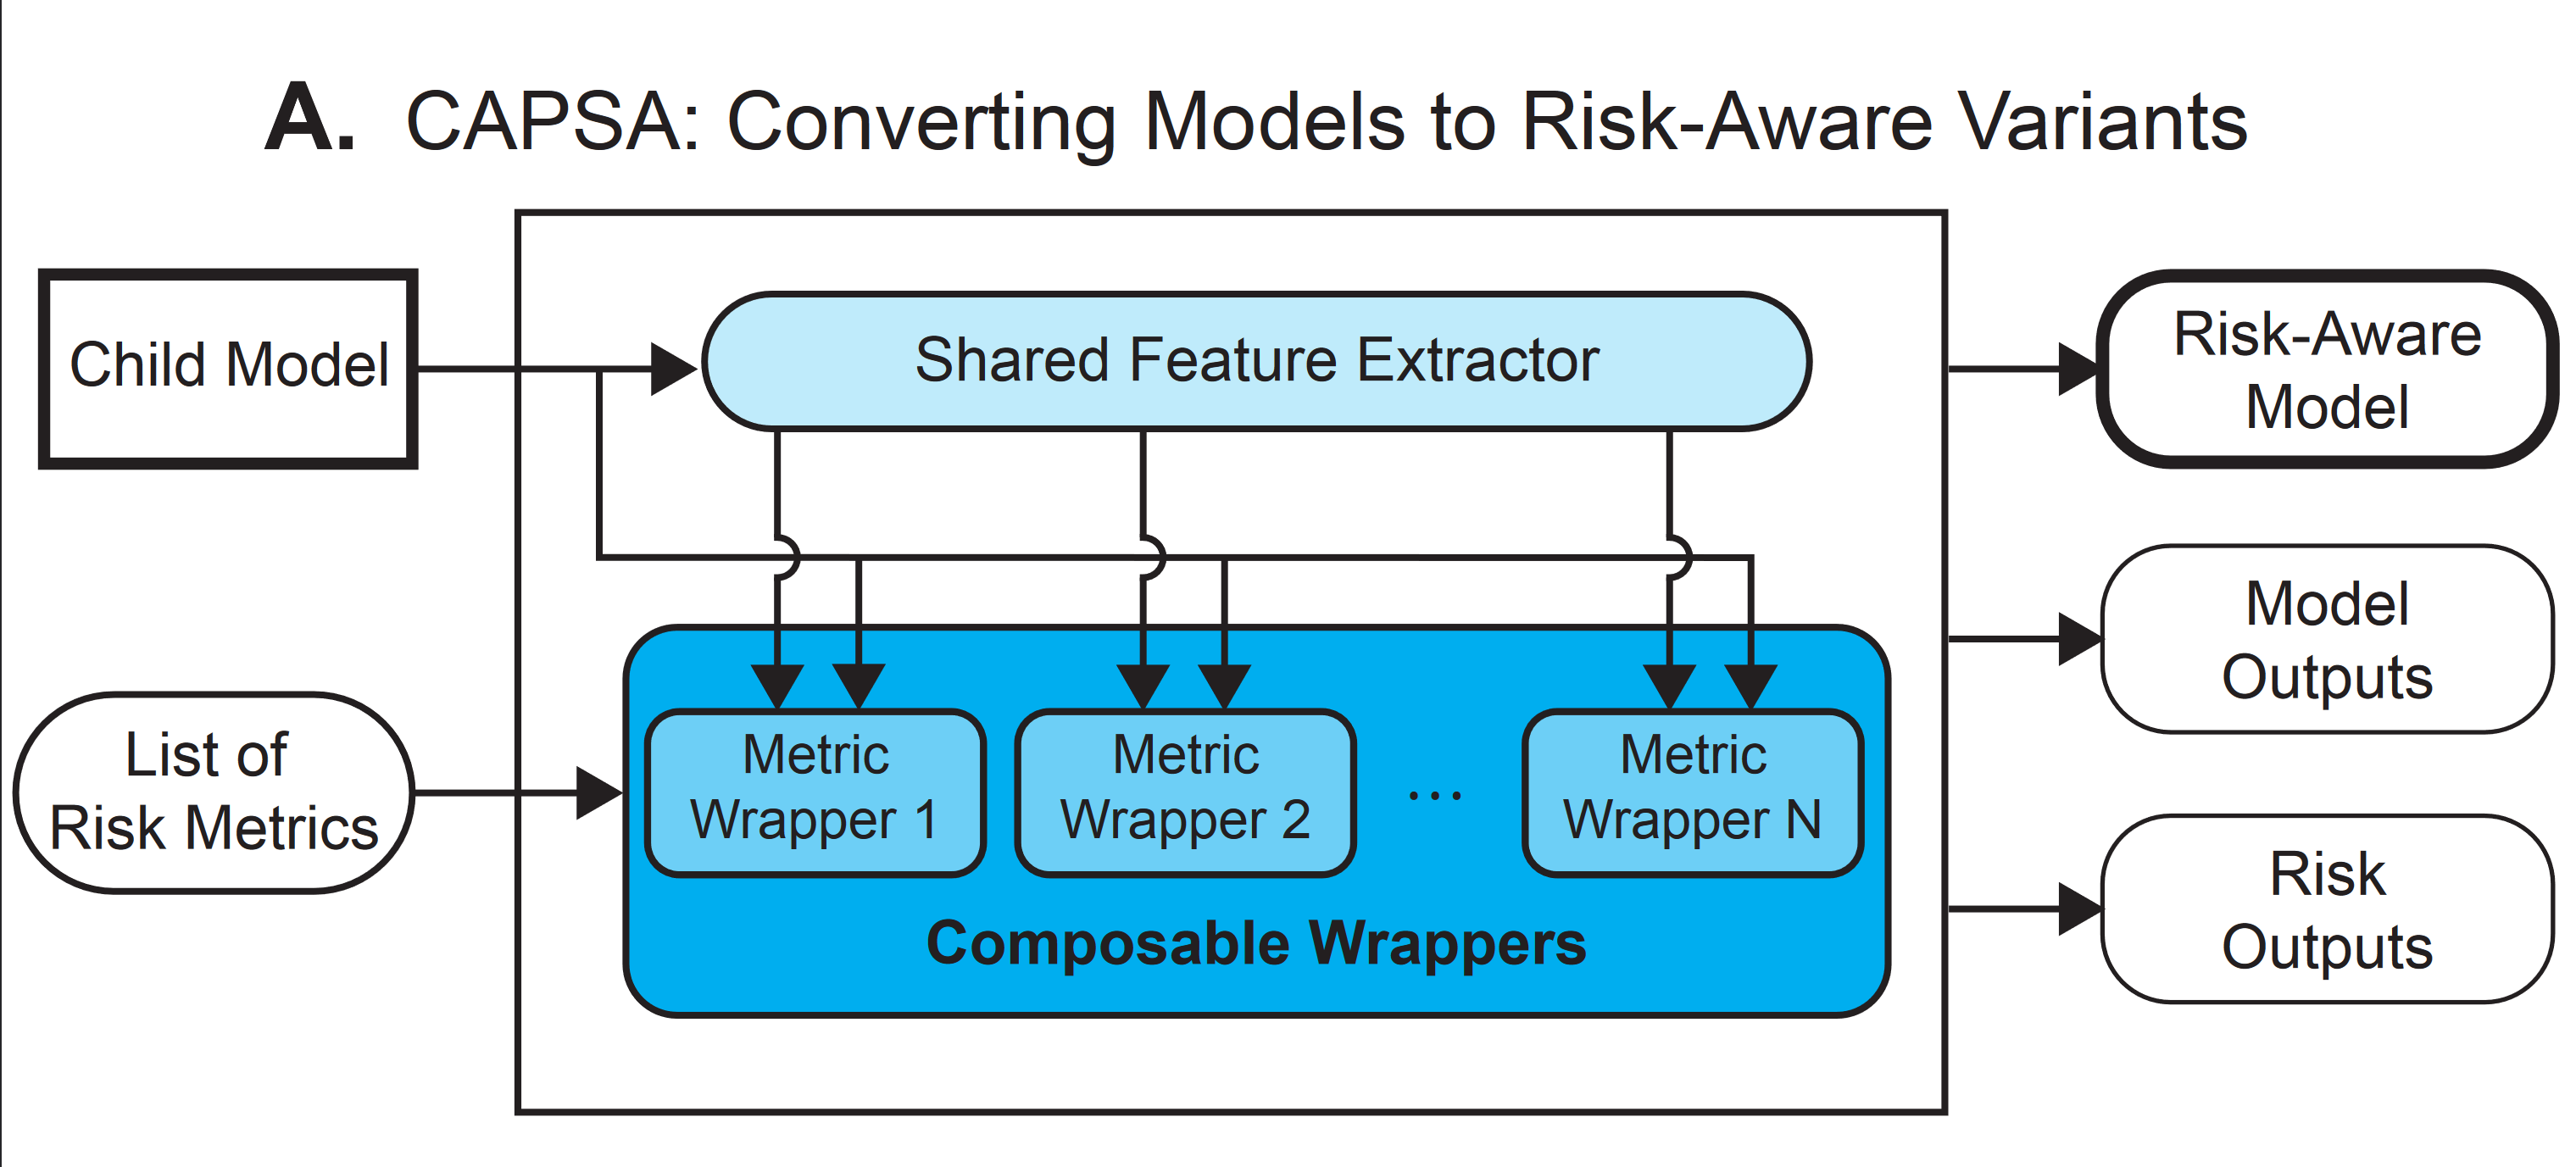
</div>
</center>

1. You would start by importing all the necessary libraries that you'd be importing in your normal workflow.

In [1]:
import tensorflow as tf
from helper import * 

2. You would have your own training and test dataset ready.

In [11]:
(x_train, y_train), (x_test, y_test) = generate_moon_data_classification()

3. You might want to visualize your own dataset to get a better understanding of your own data. So you plot your training dataset into a graph.

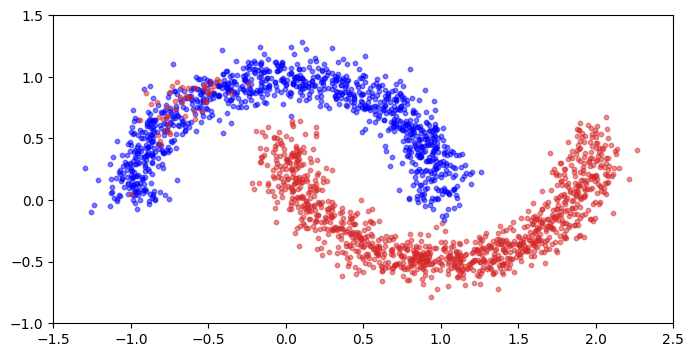

In [12]:
plot_for_moons(x_train, y_train)

4. Just like in your normal workflow, you'd have your own pre-defined model.

In [13]:
user_model = generate_model_mve_classification()

5. You import **CAPSA**'s MVEWrapper() class. This class help wrap your model model to be risk-aware towards aleatoric uncertainty. You only need to pass a predefined model. 

- <span style="color:yellow">**Aleatoric**</span> (Aleatoric Uncertainty): Aleatoric captures the noise in the data: mislabeled datapoints, ambigious labels, classes with low seperation, etc.

In [14]:
from capsa import MVEWrapper

6. You wrap your model with the MVEWrapper by simply passing your model as a parameter

In [15]:
wrapped_model = MVEWrapper(user_model)

7. You compile your model just like how you would compile any other normal Keras model. 

In [16]:
wrapped_model.compile(
            optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy()]
                     )

8. You fit your model with your dataset.

In [17]:
wrapped_model.fit(x_train,tf.one_hot(y_train,2),epochs=30)

Epoch 1/30
(None, 2)
(None, 2)
1313/1313 [==============================] - 3s 2ms/step - mve_loss: 0.4266 - mve_binary_accuracy: 0.7897
Epoch 2/30
1313/1313 [==============================] - 2s 2ms/step - mve_loss: 0.0897 - mve_binary_accuracy: 0.9737
Epoch 3/30
1313/1313 [==============================] - 2s 2ms/step - mve_loss: 0.0684 - mve_binary_accuracy: 0.9776
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - mve_loss: 0.0660 - mve_binary_accuracy: 0.9768
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - mve_loss: 0.0666 - mve_binary_accuracy: 0.9765
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - mve_loss: 0.0600 - mve_binary_accuracy: 0.9795
Epoch 7/30
1313/1313 [==============================] - 2s 2ms/step - mve_loss: 0.0639 - mve_binary_accuracy: 0.9779
Epoch 8/30
1313/1313 [==============================] - 3s 2ms/step - mve_loss: 0.0603 - mve_binary_accuracy: 0.9787
Epoch 9/30
1313/1313 [======================

9. Now, your model is trained. You can simply pass a batch of sample to predict both the class of the model, as well as the aleatoric uncertainty

Note: In the example below, we used a function called ``get_grid()`` . We used this function to generate samples in the input space. These samples are passed to our model to visually observe aleatoric uncertainty in this space. 

In [18]:
mesh_grid = get_grid()
output = wrapped_model(mesh_grid)

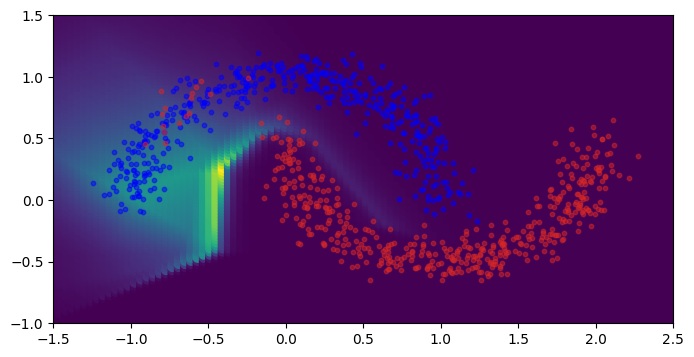

In [19]:
plot_mve_classification(output,mesh_grid,x_test,y_test)

Alternatively, we can pass a single sample to our model and get it's corresponding y_hat and aleatoric uncertainty values

In [20]:
single_sample = x_test[0:1,:]

In [21]:
output = wrapped_model(single_sample)

### Sample Prediction

In [28]:
output.y_hat

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.3574278e-15, 1.0000000e+00]], dtype=float32)>

### Sample Uncertainty

In [26]:
output.aleatoric

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.5871763e-14, 3.5843089e-11]], dtype=float32)>